In [2]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility

Epoch 1/100
94/94 - 0s - loss: 0.0571
Epoch 2/100
94/94 - 0s - loss: 0.0281
Epoch 3/100
94/94 - 0s - loss: 0.0206
Epoch 4/100
94/94 - 0s - loss: 0.0188
Epoch 5/100
94/94 - 0s - loss: 0.0174
Epoch 6/100
94/94 - 0s - loss: 0.0165
Epoch 7/100
94/94 - 0s - loss: 0.0154
Epoch 8/100
94/94 - 0s - loss: 0.0144
Epoch 9/100
94/94 - 0s - loss: 0.0133
Epoch 10/100
94/94 - 0s - loss: 0.0124
Epoch 11/100
94/94 - 0s - loss: 0.0115
Epoch 12/100
94/94 - 0s - loss: 0.0104
Epoch 13/100
94/94 - 0s - loss: 0.0097
Epoch 14/100
94/94 - 0s - loss: 0.0086
Epoch 15/100
94/94 - 0s - loss: 0.0077
Epoch 16/100
94/94 - 0s - loss: 0.0069
Epoch 17/100
94/94 - 0s - loss: 0.0064
Epoch 18/100
94/94 - 0s - loss: 0.0056
Epoch 19/100
94/94 - 0s - loss: 0.0049
Epoch 20/100
94/94 - 0s - loss: 0.0043
Epoch 21/100
94/94 - 0s - loss: 0.0039
Epoch 22/100
94/94 - 0s - loss: 0.0034
Epoch 23/100
94/94 - 0s - loss: 0.0031
Epoch 24/100
94/94 - 0s - loss: 0.0029
Epoch 25/100
94/94 - 0s - loss: 0.0027
Epoch 26/100
94/94 - 0s - loss: 0.

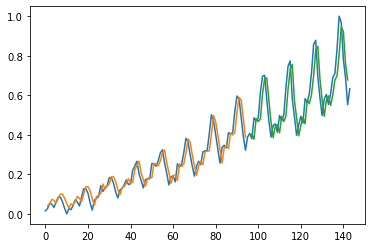

In [4]:
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1],
    engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
trainScore = math.sqrt(trainScore)
trainScore = scaler.inverse_transform(numpy.array([[trainScore]]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = model.evaluate(testX, testY, verbose=0)

testScore = math.sqrt(testScore)
testScore = scaler.inverse_transform(numpy.array([[testScore]]))
print('Test Score: %.2f RMSE' % (testScore))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()